# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
import warnings
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

## Loading Data and Viewing it

In [2]:
data = pd.read_csv("/Users/ankush/Documents/code/Machine_Learning/Unified /Project_1/Amazon Sales data.csv")
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [4]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [5]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
data['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

# EDA

In [7]:
#Removing Outlier using IQR method
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, attributes):
    outliers = []
    for attr in attributes:
        Q1 = df[attr].quantile(0.25)
        Q3 = df[attr].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        attr_outliers = df[(df[attr] < lower_bound) | (df[attr] > upper_bound)]
        outliers.append(attr_outliers)
    return outliers

# List of integer and float attributes
numeric_attributes = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Detect outliers using the IQR method
outliers_iqr = detect_outliers_iqr(data, numeric_attributes)

# Concatenate the outlier data frames into a single DataFrame
data_outlier = pd.concat(outliers_iqr)

# Remove outliers from the original DataFrame
data_outlier_removed = data.drop(data_outlier.index)

# Reset index of the new DataFrame
data_outlier_removed.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print("Outliers Removed DataFrame:")
data_outlier_removed.head()

Outliers Removed DataFrame:


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Findin Trends and Ways to Minimise Cost and Increase Profit.

#### Finding which Country is contributing the most towards the total profit

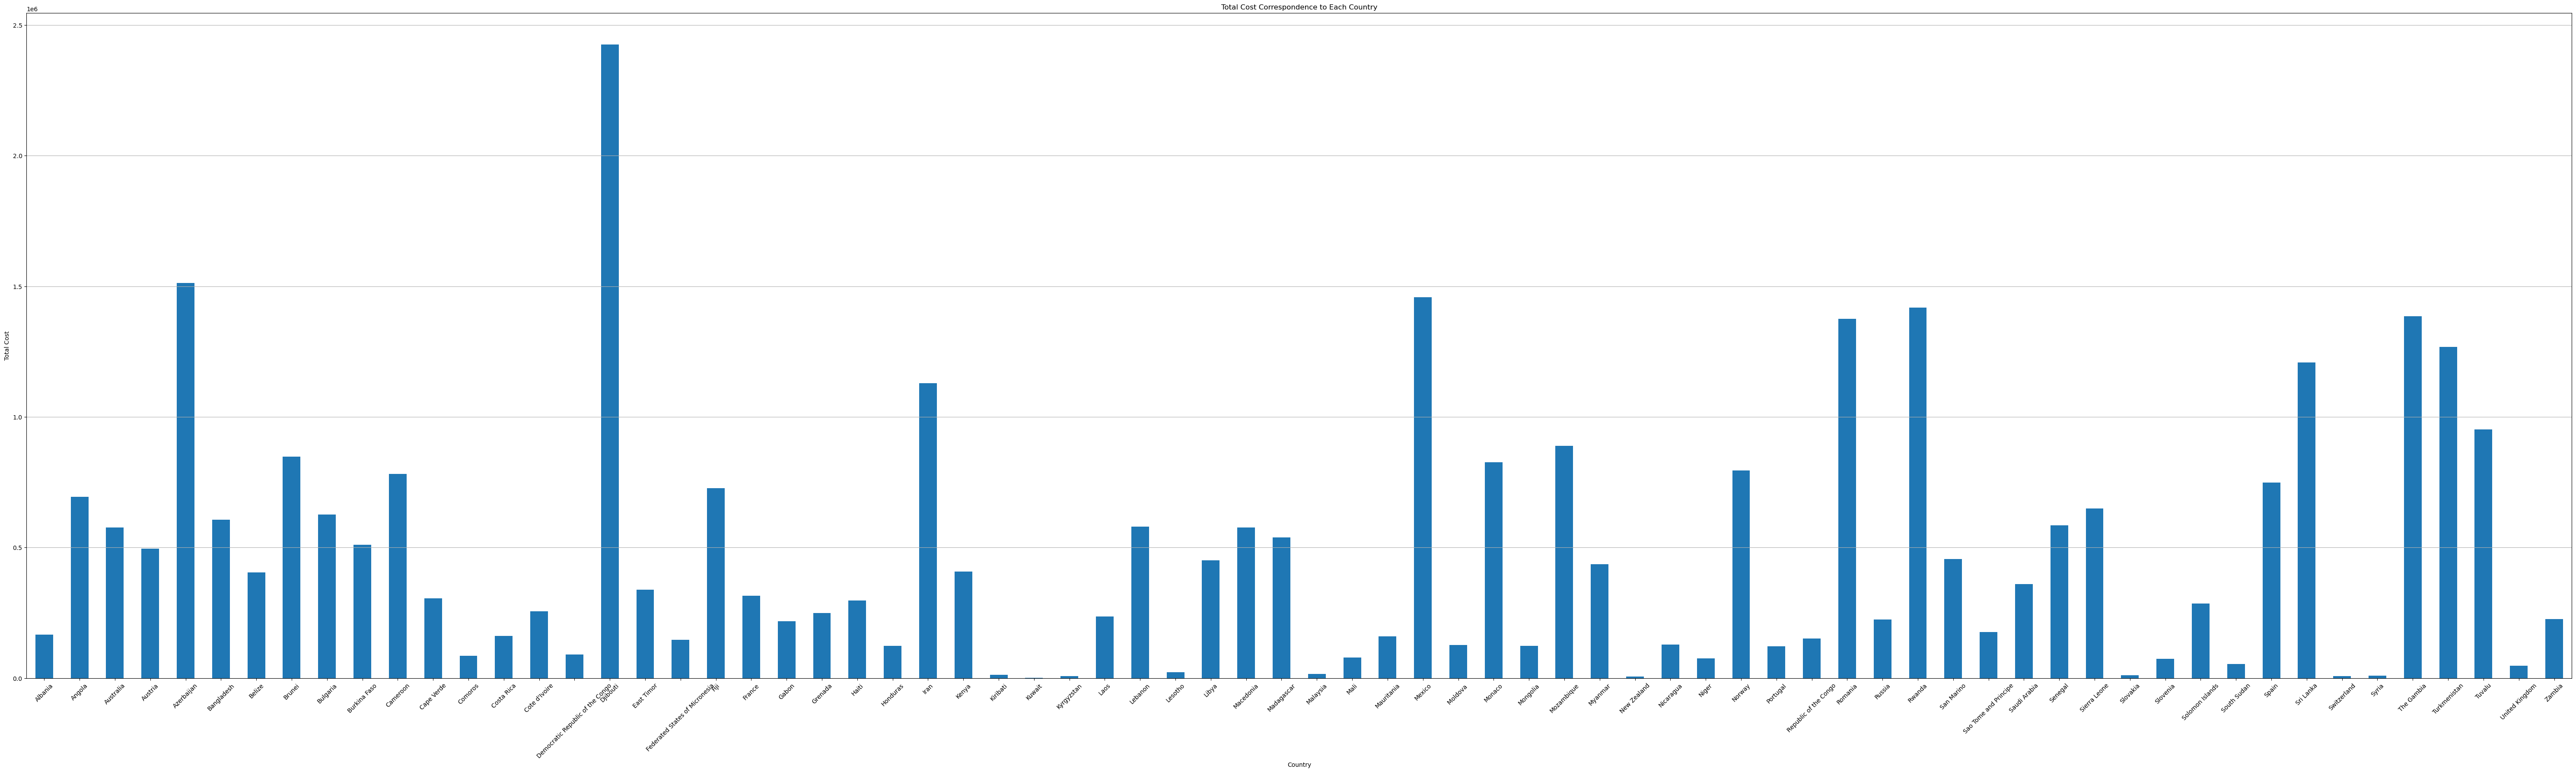

In [8]:
country_total_cost = data_outlier_removed.groupby('Country')['Total Profit'].sum()
plt.figure(figsize = (76,20))
country_total_cost.plot(kind='bar')
plt.title('Total Cost Correspondence to Each Country')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Conclusion
### Top Performing Countries:
Our analysis reveals that Djibouti, Myanmar, and Pakistan have exhibited the highest total profits. These countries present significant opportunities for sales growth and should be prioritized in our strategic focus. By leveraging our strengths in these markets, we can further solidify our position and capitalize on existing momentum.

### Areas for Improvement:
On the other hand, Kyrgyzstan, New Zealand, and Kuwait have shown lower total profits. While these markets present challenges, they also offer opportunities for improvement and growth. It's essential to allocate resources effectively and implement targeted strategies to address the specific needs and challenges of these regions. By doing so, we can optimize our sales efforts and unlock untapped potential in these markets.

#### Finding the most growing product Type.

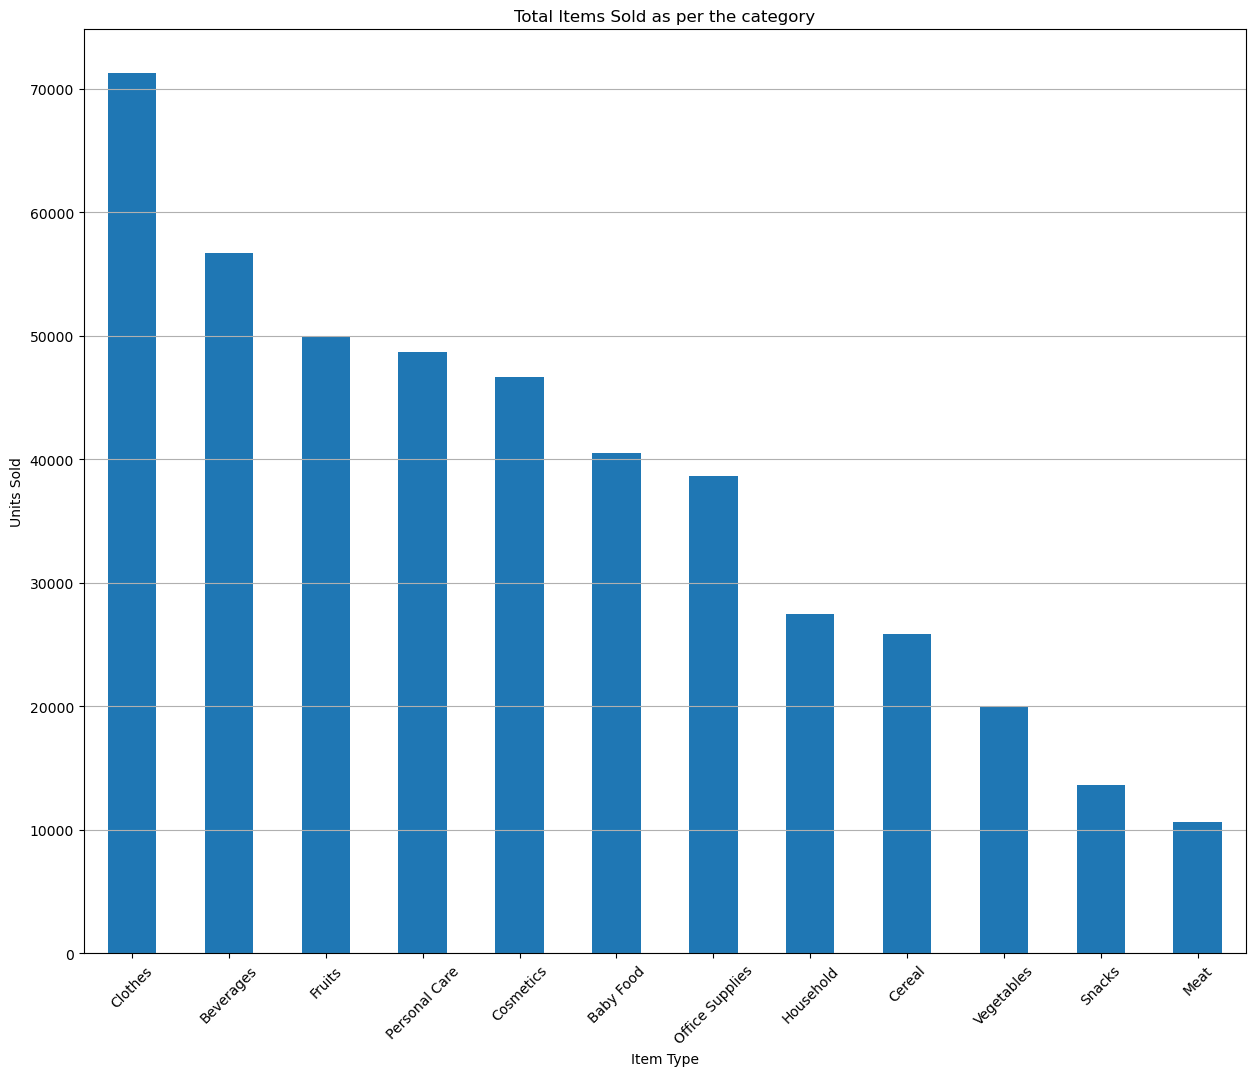

In [9]:
most_item_sold = data_outlier_removed.groupby('Item Type')['Units Sold'].sum()
most_item_sold_sorted = most_item_sold.sort_values(ascending=False)
plt.figure(figsize = (15,12))
most_item_sold_sorted.plot(kind = 'bar')
plt.title('Total Items Sold as per the category')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Conclusion: 
Cosmetics have emerged as the top-selling product category among twelve types analyzed in our dataset. Their consistent performance indicates a strong market demand and consumer preference for beauty and personal care products. This success underscores our competitive advantage in this segment and presents opportunities for further growth. To capitalize on this, we recommend continuing investment in cosmetics

In [10]:
sales_data = data_outlier_removed.copy()
# Convert total profits to lakhs
sales_data['Total Profit (Lakhs)'] = sales_data['Total Profit'] / 100000  # 1 lakh = 100,000

# Calculate total profits per item type
total_profits_per_item_type = sales_data.groupby('Item Type')['Total Profit (Lakhs)'].sum().sort_values(ascending=False)
print(f"Total Profits Distribution by Item Type in Lakhs{total_profits_per_item_type}")

Total Profits Distribution by Item Type in LakhsItem Type
Cosmetics          81.099923
Clothes            52.333344
Office Supplies    48.833500
Household          45.580722
Baby Food          38.866437
Cereal             22.924434
Vegetables         12.658196
Personal Care      12.206225
Beverages           8.880473
Snacks              7.519442
Meat                6.106100
Fruits              1.204952
Name: Total Profit (Lakhs), dtype: float64


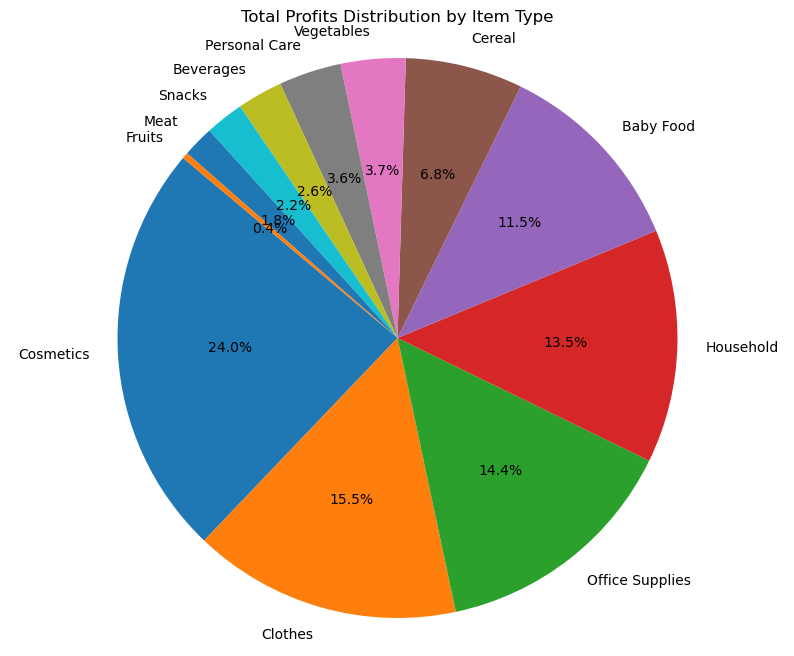

In [11]:
# Visualize total profits per item type as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(total_profits_per_item_type, labels=total_profits_per_item_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Profits Distribution by Item Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Conclusion :
Analysis reveals a stark contrast in profitability between cosmetics and clothes, with cosmetics boasting a robust profit percentage of 24%, while all food & beverages item lag behind at 10.7%. This disparity underscores the importance of strategic decision-making in resource allocation and product focus

## Profit Metrics by Order Priority
This Visualization calculates the mean of profit margin, total revenue, total cost, and total profit for each order priority level. Then, it creates a grouped bar chart to visualize these metrics side by side for each order priority level.

###### In the context of order priority, the terms "C", "H", "L", and "M" likely represent different priority levels assigned to orders. Here's a possible interpretation:

* C: Critical
* H: High
* L: Low
* M: Medium

<Figure size 1200x800 with 0 Axes>

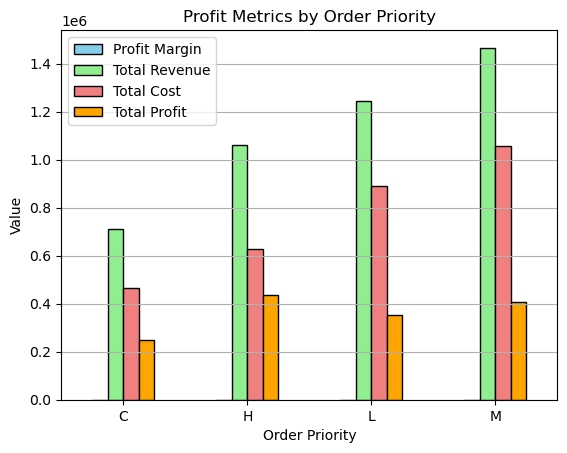

In [12]:
# Calculate profit margin
sales_data['Profit Margin'] = (sales_data['Total Profit'] / sales_data['Total Revenue']) * 100  # Convert to percentage

# Group the data by order priority and calculate relevant metrics
order_priority_analysis = sales_data.groupby('Order Priority').agg({
    'Profit Margin': 'mean',
    'Total Revenue': 'mean',
    'Total Cost': 'mean',
    'Total Profit': 'mean'
})

# Visualize profit metrics by order priority using a grouped bar chart
plt.figure(figsize=(12, 8))
order_priority_analysis.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'orange'], edgecolor='black')
plt.title('Profit Metrics by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(["Profit Margin", "Total Revenue", "Total Cost", "Total Profit"], loc='upper left')
plt.grid(axis='y')
plt.show()


### Management Report: Order Priority Analysis
Analysis reveals a divergence between revenue and profit based on order priority. While medium priority orders drive the highest revenue, orders with high priority levels yield the maximum profit. This highlights the need to balance revenue generation with profitability. To optimize results, prioritizing high priority orders for resource allocation and operational focus is recommended.

### Profit based on Sales Channel

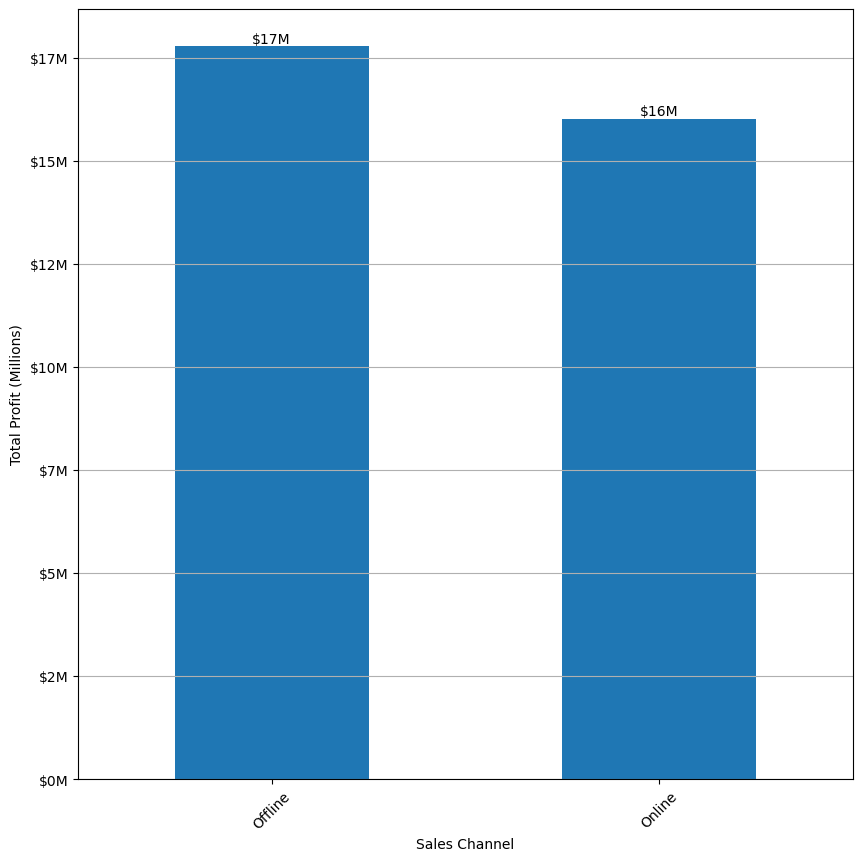

In [13]:
from matplotlib.ticker import FuncFormatter

# Assuming 'data' is your DataFrame with 'Sales Channel' and 'Total Profit' columns
profit_per_channel = data_outlier_removed.groupby('Sales Channel')['Total Profit'].sum() / 1000000  # Convert to millions

# Plotting the data
plt.figure(figsize=(10, 10))
ax = profit_per_channel.plot(kind='bar')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit (Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Format ticks on y-axis to display in millions
formatter = FuncFormatter(lambda x, _: f'${int(x)}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Annotating each bar with its value
for i, value in enumerate(profit_per_channel):
    ax.text(i, value, f'${int(value)}M', ha='center', va='bottom')

plt.show()


### Management Report: Profit Analysis by Sales Channel
The analysis indicates that the offline sales channel has yielded 17 million in profit, surpassing the 16 million generated by the online channel. This highlights the offline channel's effectiveness in profit generation.

Order Date with total revenue to find the seasonal changes.

### Total Revenue Over Time
A plot for individual data points (scatter plot) and connect them with a line (line plot) to visualize the trend over time. 

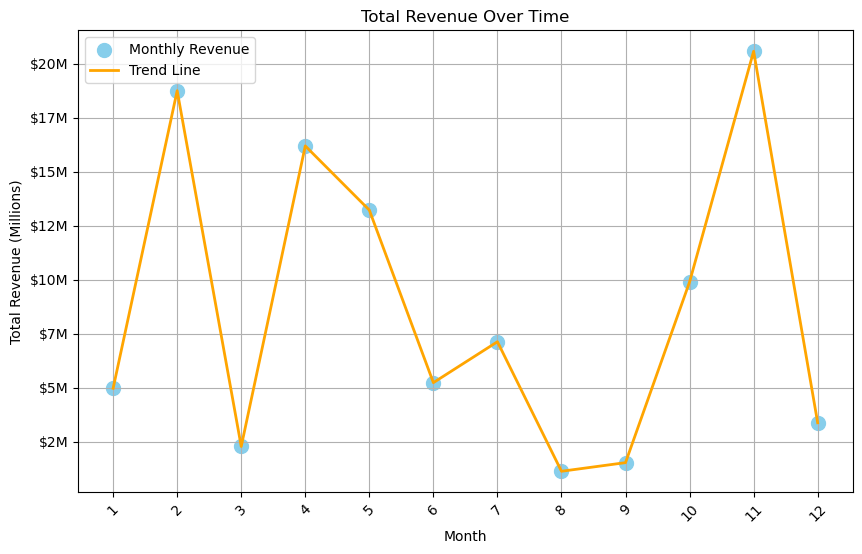

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

data_copy = sales_data.copy()

# Convert 'Order Date' column to datetime
data_copy['Order Date'] = pd.to_datetime(data_copy['Order Date'])

# Extract month from the 'Order Date' column and create a new 'Month' column
data_copy['Month'] = data_copy['Order Date'].dt.month

# Group by 'Month' and sum the 'Total Revenue' for each month
revenue_per_month = data_copy.groupby('Month')['Total Revenue'].sum() / 1000000  # Convert to millions

# Plotting every entry in revenue_per_month
plt.figure(figsize=(10, 6))
plt.scatter(range(len(revenue_per_month)), revenue_per_month.values, color='skyblue', marker='o', s=100, label='Monthly Revenue')
plt.plot(range(len(revenue_per_month)), revenue_per_month.values, color='orange', linewidth=2, linestyle='-', label='Trend Line')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(range(len(revenue_per_month)), revenue_per_month.index, rotation=45)
plt.grid(True)
plt.legend()

# Format ticks on y-axis to display in millions
formatter = FuncFormatter(lambda x, _: f'${int(x)}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


### Monthly Revenue Analysis
The visualization highlights significant monthly revenue fluctuations. The **eleventh month** marks the peak revenue period, while the **eighth month** records the lowest. Understanding these trends enables strategic adaptation to capitalize on peak periods and optimize performance during lower-revenue months, fostering sustainable growth.

### Monthly Total Profit Trends 

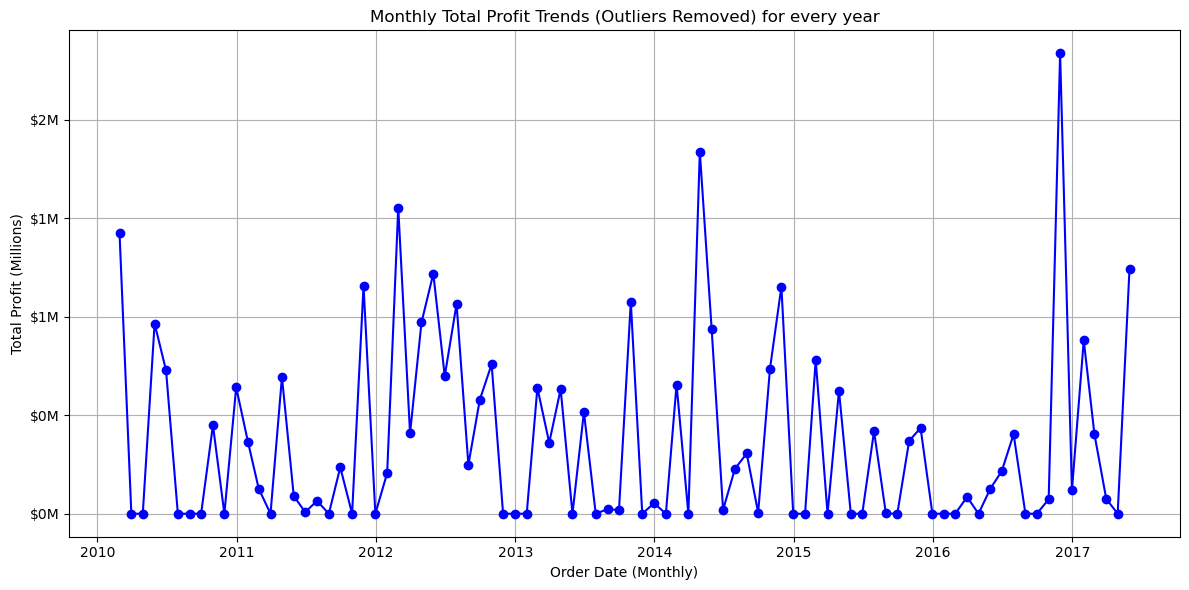

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
from matplotlib.ticker import FuncFormatter

# Make a copy of the original DataFrame
data_outlier_removed = data_copy.copy()

# Remove outliers from the 'Total Profit' column
Q1 = data_outlier_removed['Total Profit'].quantile(0.25)
Q3 = data_outlier_removed['Total Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_outlier_removed = data_outlier_removed[(data_outlier_removed['Total Profit'] > lower_bound) & (data_outlier_removed['Total Profit'] < upper_bound)]

# Convert the 'Order Date' column to datetime format
data_outlier_removed['Order Date'] = pd.to_datetime(data_outlier_removed['Order Date'])

# Set 'Order Date' as the index
data_outlier_removed.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and calculate total profit for each month
monthly_profit = data_outlier_removed.resample('M')['Total Profit'].sum()

# Convert profit to millions
monthly_profit_millions = monthly_profit / 1000000  # Convert to millions

# Now, let's create the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit_millions.index, monthly_profit_millions.values, color='blue', marker='o', linestyle='-')
plt.title('Monthly Total Profit Trends (Outliers Removed) for every year')
plt.xlabel('Order Date (Monthly)')
plt.ylabel('Total Profit (Millions)')

# Format ticks on y-axis to display in millions
formatter = FuncFormatter(lambda x, _: f'${int(x)}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Enable hovering over the graph to show total profit for each month
mplcursors.cursor(hover=True).connect('add', lambda sel: sel.annotation.set_text(f'Total Profit: ${sel.target[1]}M'))

plt.grid(True)
plt.tight_layout()
plt.show()

### Finding Corelation

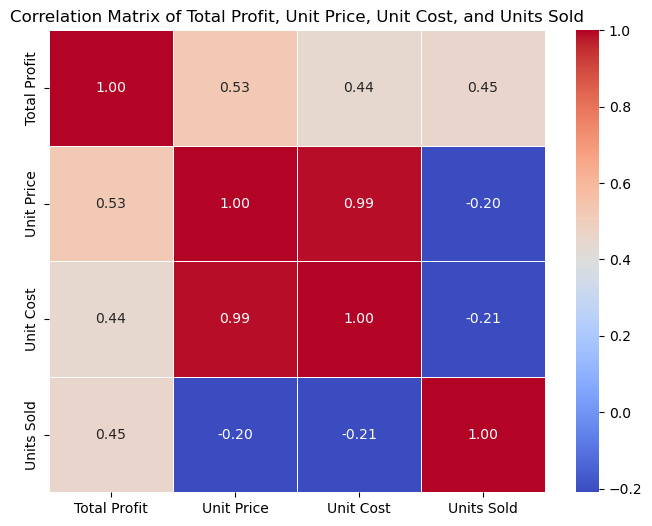

In [16]:
# Calculate the correlation matrix
correlation_matrix = sales_data[['Total Profit', 'Unit Price', 'Unit Cost', 'Units Sold']].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Total Profit, Unit Price, Unit Cost, and Units Sold')
plt.show()


By analyzing this chart, you can identify any seasonal patterns or trends that may impact profitability. For example, you may observe higher profits during certain months due to increased sales volume or seasonal demand fluctuations. This information can help you adjust your strategies accordingly to maximize profitability throughout the year.

### Moderate Strength:
A correlation coefficient of 0.53 between unit price and total profit, indicates a moderate strength of the relationship. While it's not a perfect correlation (1.0), it's still significant enough to suggest a noticeable pattern between the two variables, suggesting that changes in unit price may be associated with changes in profit